<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/Assignment1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load two `pandas` `DataFrame` objects, one called `data` that has a single column for each year of the data, and another called `time_series` that contains a single column called `production` that contains the time series for Japanese automobile production over time. 

In [1]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_a1.sh > fetch_a1.sh
!bash fetch_a1.sh

# Example
time_series = pd.read_csv('japanese_auto_production.csv', parse_dates=['year']).set_index('year')

data = pd.read_csv('a1_beer_data.csv').set_index('month')

data.columns = [str(i) for i in data.columns]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   317  100   317    0     0   2663      0 --:--:-- --:--:-- --:--:--  2663
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8004  100  8004    0     0  56366      0 --:--:-- --:--:-- --:--:-- 56366
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3064  100  3064    0     0  33670      0 --:--:-- --:--:-- --:--:-- 33670
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   689  100   689    0     0   5425      0 --:--:-- --:--:-- --:--:--  5425


# Exploring and Plotting Data


### Inspecting the data

Let's start by printing out the data. The `data` variable is called a `DataFrame`, which is a table-like data structure with rows and columns. In this case, we have a row for each month and a columns for each year of observations. 

Notice the `NaN` ("Not a number") values, or data for which we don't have observations.

Note that you may have to scroll to the right (over the table output) to see more years.

*Press the play button in Google Colab or press `Shift+Enter` execute the cell below*

In [2]:
display(data)

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,104.6,116.4,131.5,131.2,126.9,132.6,128.1,153.1,164.1,161.4,182.7,159.8,170.7,173.7,170.0,203.6,159.4,141.6,151.5,166.5,161.2,177.2,154.1,153.3,172.0,164.4,147.0,139.0,151.0,138.0
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,107.1,112.6,131.0,125.4,124.0,123.7,138.4,147.6,142.8,169.4,145.2,157.8,164.4,153.8,158.4,175.2,161.1,148.1,158.1,151.3,155.5,127.4,159.3,144.3,150.6,148.1,133.0,143.0,134.0,136.0
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,123.5,123.8,130.5,126.5,135.7,153.3,152.7,157.7,157.9,168.8,182.1,168.2,179.7,175.6,176.1,168.7,172.1,184.9,143.0,146.2,141.9,177.1,160.4,169.6,163.3,152.0,163.0,150.0,164.0,152.0
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,98.8,103.6,118.9,119.4,130.0,134.0,120.0,137.2,159.2,158.1,158.7,158.4,157.0,147.1,156.2,155.9,158.4,132.5,151.2,148.3,164.6,154.4,151.9,143.7,153.7,144.1,150.0,154.0,126.0,127.0
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,98.6,113.9,114.3,113.5,109.4,119.6,140.5,151.5,162.2,158.5,141.6,152.0,168.0,160.3,153.2,147.3,114.6,137.3,147.6,144.7,136.2,135.2,148.4,160.1,152.9,155.0,129.0,137.0,131.0,151.0
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,90.6,98.6,85.7,98.7,117.8,116.2,116.2,98.7,123.1,135.3,132.6,142.2,139.3,135.2,117.9,137.0,159.6,135.5,130.7,123.6,126.8,126.4,139.6,135.6,135.5,124.5,131.0,129.0,125.0,130.0
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,89.1,95.0,104.6,114.5,120.3,118.6,121.4,145.8,130.0,149.3,139.6,137.2,138.6,148.8,149.8,141.1,159.7,121.7,137.5,151.6,152.5,147.3,148.2,141.8,148.5,153.0,145.0,128.0,127.0,119.0
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,105.2,116.0,105.1,113.8,121.0,130.7,127.8,151.7,150.1,143.4,147.0,152.6,153.4,151.0,156.6,167.4,159.4,166.1,146.1,133.9,126.6,140.6,153.5,159.9,148.4,146.0,137.0,140.0,143.0,153.0
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,114.0,113.9,117.3,133.1,132.3,129.3,143.6,129.4,169.4,142.2,166.6,166.8,138.9,148.2,166.7,160.2,160.7,146.8,133.6,137.4,150.1,152.3,145.1,145.7,133.6,138.0,138.0,143.0,143.0,NaN


### Selecting Rows and Columns

We can make simple selections of rows and columns in our data using the square bracket `[]` operator and the `loc` function. 

Giving the `[]` operator the name of a single column will return that column, e.g. `data['1989']` will return the entire `1989` column.

If we pass in a comma-separated sequence of names contained in a `[]` (called a `list` in Python), we can select multiple columns, e.g. `data[['1980','1981']]` will return a dataframe with only two columns selected.

In [3]:
# Disply just ONE column, the 1989 column
display(data['1989'])

# Display MORE THAN ONE column, the 1980 and 1981 columns
display(data[['1980','1981']])

month
January      138.0
February     136.0
March        152.0
April        127.0
May          151.0
June         130.0
July         119.0
August       153.0
September      NaN
October        NaN
November       NaN
December       NaN
Name: 1989, dtype: float64

,1980,1981
month,,
January,161.2,177.2
February,155.5,127.4
March,141.9,177.1
April,164.6,154.4
May,136.2,135.2
June,126.8,126.4
July,152.5,147.3
August,126.6,140.6
September,150.1,152.3


If we want to select individual cells from the `DataFrame`, we can use the `loc` operator, where the first argument is the row you want to select and the second is the column. If you want to select *all* rows or columns, you can substitute `:` to mean *all elements*. 

In [4]:
# Select February of 1979
display(data.loc['February','1979'])

# Select all Februarys
# Select February of 1979
display(data.loc['February',:])

151.3

1950     96.0
1951     82.8
1952     84.4
1953     84.4
1954     93.0
1955     92.5
1956     84.8
1957     91.2
1958    102.1
1959     96.6
1960    107.1
1961    112.6
1962    131.0
1963    125.4
1964    124.0
1965    123.7
1966    138.4
1967    147.6
1968    142.8
1969    169.4
1970    145.2
1971    157.8
1972    164.4
1973    153.8
1974    158.4
1975    175.2
1976    161.1
1977    148.1
1978    158.1
1979    151.3
1980    155.5
1981    127.4
1982    159.3
1983    144.3
1984    150.6
1985    148.1
1986    133.0
1987    143.0
1988    134.0
1989    136.0
Name: February, dtype: float64

### Calculating Simple Numeric Statistics

Once we've selected a subset of data that we want to work with, we can then call some simple numeric functions on the data. many functions are available as *methods on the `DataFrame` or individual column and are accessible using the `.function_name(function_arguments)` notation. 

As an example, we can calculate the mean of all data from February by first selecting the data from February, then adding `.mean()` to the end of the code

*Press the play button in Google Colab or press `Shift+Enter` to execute the cell below*

In [5]:
# Select just February data and calculate the mean

display(data.loc['February', :].mean())

130.86000000000004

### Making Simple Plots

To plot a single column of a `DataFrame` as a time series plot, you can simply use the `.plot()` function, e.g. `time_series['production'].plot()`

Here, we'll use the `time_series` `DataFrame`, which has a single column containing yearly auto production data for Japanese cars. 



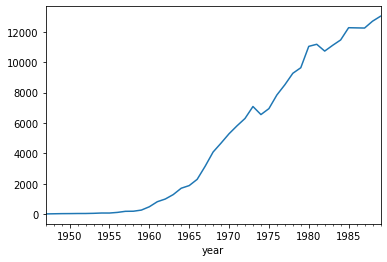

In [6]:
time_series['production'].plot()

*Everything* in a plot can be customized. Below, we show several useful options for adding titles and adjusting the size of a plot. 

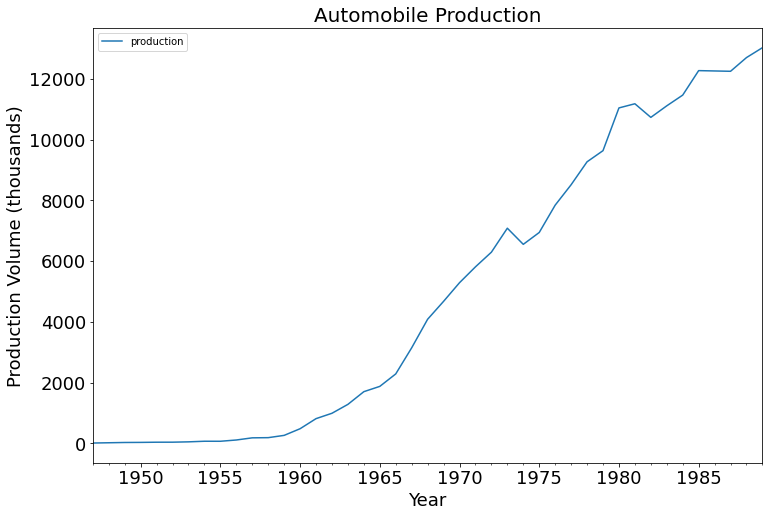

In [7]:
FONT_SIZE = 18
f = plt.figure(figsize=(12,8))

ax=plt.subplot()
time_series.plot(ax=ax,fontsize=FONT_SIZE)
title = plt.title('Automobile Production', size=FONT_SIZE+2)
x_yabel = plt.xlabel('Year', size=FONT_SIZE)
y_yabel = plt.ylabel('Production Volume (thousands)', size=FONT_SIZE)

# Numeric Transformations

We can create a *new* column in a `DataFrame` from an existing one by manipulating an existing column with simple algebra or funcitons and *assigning the result to a new column*. 

For example: `time_series['plus_500'] = time_series['production'] + 500`

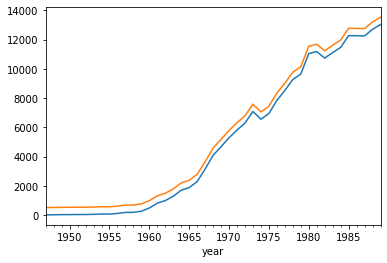

In [8]:
time_series['plus_500'] = time_series['production'] + 500

time_series['production'].plot()
time_series['plus_500'].plot()

A slightly more complex example might be subtracting the mean (computed with the `.mean()` function) from a column:

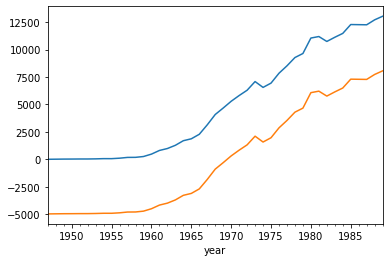

In [9]:
time_series['without_mean'] = time_series['production'] - time_series['production'].mean()

time_series['production'].plot()
time_series['without_mean'].plot()

Transformations can also be applied to multiple columns in the same `DataFrame` by just applying algebra to the columns, e.g.

`time_series['difference'] = time_series['plus_500'] - time_series['plus_500']`

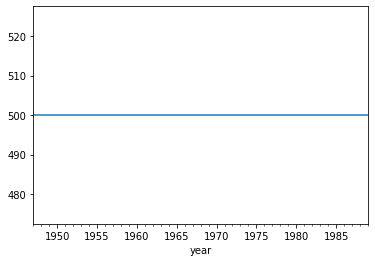

In [10]:
time_series['difference'] = time_series['plus_500'] - time_series['production']

time_series['difference'].plot()

### More complex transformations

The `pandas` package provides many built in functions that can be accessed with the same `.function_name(function_arguments)` notation as for simple numeric statistics. One such function that will be very useful for our purposes is the `.shift()` function, which allows you to shift a series by a set number of time steps. For example, `time_series.shift(1)` would shift the data by one time step:


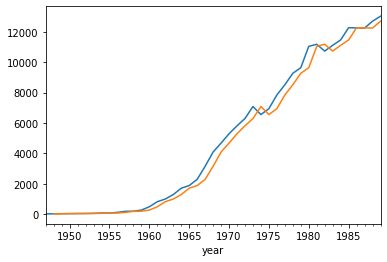

In [11]:
time_series['shift1'] = time_series['production'].shift(1)

time_series['production'].plot()

time_series['shift1'].plot()

### Other Numeric Functions
Many many numeric transformations and simple mathematical functions are provided by the `numpy` Python package (a package for numerical computing in Python). 

To use a function from `numpy`, you just have to import it from the package, e.g.

`from numpy import log`

`time_series['log_transform'] = log(time_series['production'])`

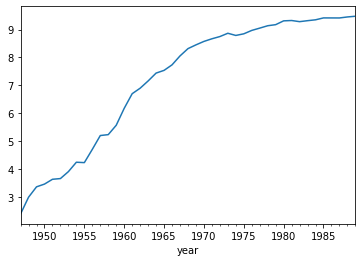

In [12]:
from numpy import log

time_series['log_transform'] = log(time_series['production'])

time_series['log_transform'].plot()

### Mean Absolute Percent Error Example

As a last example, let's consider computing the mean absolute percent error between the `production` column and the `shift1` column (which is a naive forecast NF1). 

To do this, we need to:

1. Subtract the two columns
2. Take the absolute value of the difference
3. Divide the absolute value of the difference by the `production` column
4. Take the 

For step 2), we'll use the `numpy` function `abs`, which we can import with:

`from numpy import abs`

For step 4), we can either use the pandas built-in function `.mean()` as we saw above for simple stats, or we can use the `numpy` function `mean()`. Both will do the same thing!

For the rest of the calculation, we can just apply algebra to the columns. 

In [13]:
from numpy import abs, mean

time_series['difference'] = time_series['shift1'] - time_series['production']
time_series['absolute_difference'] = abs(time_series['difference'])
time_series['absolute_percent_error'] = time_series['absolute_difference'] / time_series['production']

MAPE1 = time_series['absolute_percent_error'].mean()

MAPE2 = mean(time_series['absolute_percent_error'])

print(MAPE1)

print(MAPE2)

0.1494871524977995
0.1494871524977995
